# 전이 학습 예제(Cats ans Dogs)

## <span style="font-size:25px">Fine-Tuning using Xception model</span>

<img src="picture/TF_img_26_1.png" alt="TF_img_26_1" width=850>

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_WIDTH = 224
IMG_HEIGHT = 224

base_model = Xception(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(16, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='softmax')     # 정답은 'cat', 'dog' 2개이므로 출력층 노드는 2개
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 16)                32784     
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 20,894,298
Trainable params: 20,839,770
Non-trainable params: 54,528
_____________________________________

In [30]:
train_dir = './datafile/cats_and_dogs-sample/cats_and_dogs_filtered/train'
test_dir = './datafile/cats_and_dogs-sample/cats_and_dogs_filtered/validation'

train_data_gen = ImageDataGenerator(rescale=1./255, 
                                    rotation_range=10, width_shift_range=0.1, 
                                    height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [31]:
train_data = train_data_gen.flow_from_directory(train_dir, batch_size=32, 
                                                color_mode='rgb', shuffle=True, class_mode='categorical', 
                                                target_size=(IMG_WIDTH, IMG_HEIGHT))
test_data = test_data_gen.flow_from_directory(test_dir, batch_size=32, 
                                              color_mode='rgb', shuffle=True, class_mode='categorical', 
                                              target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
print(train_data.class_indices.items())
print(test_data.class_indices.items())

#print(len(train_data.classes))
#print(len(test_data.classes))

#print(train_data.num_classes)
#print(test_data.num_classes)

dict_items([('cats', 0), ('dogs', 1)])
dict_items([('cats', 0), ('dogs', 1)])


In [33]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(2e-5), 
              metrics=['accuracy'])

In [34]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

save_file_name = './cats_and_dogs_filtered_Xception.h5'

checkpoint = ModelCheckpoint(save_file_name, monitor='val_loss', 
                             verbose=2, save_best_only=True, mode='auto')

earlystopping = EarlyStopping(monitor='val_loss', patience=5)

hist = model.fit(train_data, epochs=30, validation_data=test_data, 
                 callbacks=[checkpoint, earlystopping])

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.4628 - accuracy: 0.8405
Epoch 1: val_loss improved from inf to 0.11762, saving model to .\cats_and_dogs_filtered_Xception.h5
63/63 [==============================] - 33s 365ms/step - loss: 0.4628 - accuracy: 0.8405 - val_loss: 0.1176 - val_accuracy: 0.9710
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.1834 - accuracy: 0.9640
Epoch 2: val_loss improved from 0.11762 to 0.05522, saving model to .\cats_and_dogs_filtered_Xception.h5
63/63 [==============================] - 22s 351ms/step - loss: 0.1834 - accuracy: 0.9640 - val_loss: 0.0552 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9735
Epoch 3: val_loss improved from 0.05522 to 0.04328, saving model to .\cats_and_dogs_filtered_Xception.h5
63/63 [==============================] - 22s 351ms/step - loss: 0.1020 - accuracy: 0.9735 - val_loss: 0.0433 - val_accuracy: 0.9830
Epoch 4/30


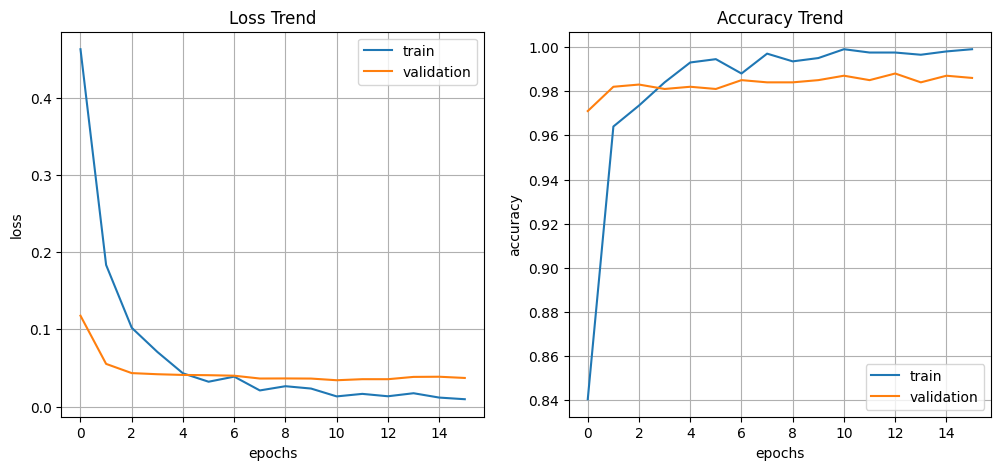

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend(loc='best')
plt.grid()

plt.show()

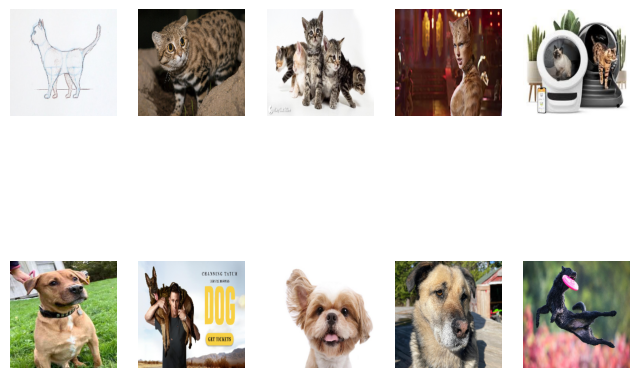

In [36]:
# 테스트 데이터 전처리
import cv2, glob

test_img_list = []
test_img_name_list = glob.glob('datafile\cats_and_dogs-sample\cats_and_dogs_test\mixpicture\*')

for i in range(len(test_img_name_list)):

    src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))

    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

    dst_img = dst_img / 255.0

    test_img_list.append(dst_img)

plt.figure(figsize=(8,6))
for i in range(len(test_img_list)):
    plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(test_img_list[i])
plt.show()

In [37]:
for ii in range(len(test_img_list)):
    print(test_img_list[i].shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


1/1 [==============================] - 1s 715ms/step


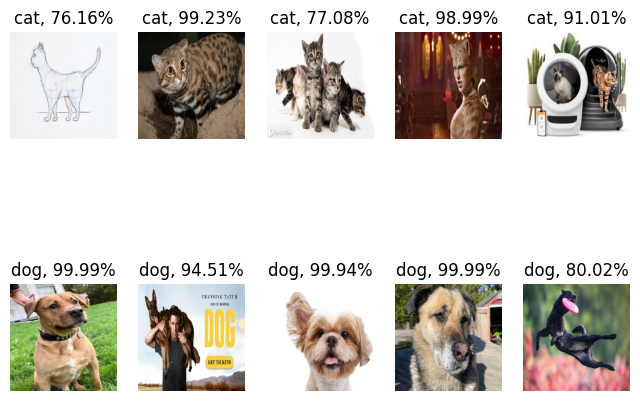

In [38]:
import numpy as np

pred = model.predict(np.array(test_img_list))

class_name = ['cat', 'dog']     # ImageDataGenerator에서 cat = 0, dog = 1

plt.figure(figsize=(8, 6))

for i in range(len(pred)):
    plt.subplot(2, 5, i+1)
    prediction = str(class_name[np.argmax(pred[i])])
    probility = '{0:0.2f}'.format(100*max(pred[i]))
    title_str = prediction + ', ' + probility + '%'
    plt.axis('off')
    plt.title(title_str)
    plt.imshow(test_img_list[i])